In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:98% ! important; }<style>"))

C:\Users\singh\AppData\Local\Temp\ipykernel_18580\4261164073.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Importing datasets
and performing cleaning operations

In [3]:
acq = pd.read_csv(r"D:\AnalytixLabs\4. Python\Assignment\Case Study 2 - Credit Card Case Study\Customer Acqusition.csv")
acq

,No,Customer,Age,City,Product,Limit,Company,Segment
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed
1,2,A2,71,CALCUTTA,Silver,100000.0,C2,Salaried_MNC
2,3,A3,34,COCHIN,Platimum,10000.0,C3,Salaried_Pvt
3,4,A4,47,BOMBAY,Platimum,10001.0,C4,Govt
4,5,A5,56,BANGALORE,Platimum,10002.0,C5,Normal Salary
...,...,...,...,...,...,...,...,...
95,96,A96,54,CHENNAI,Silver,100000.0,C19,Salaried_Pvt
96,97,A97,58,TRIVANDRUM,Platimum,10000.0,C20,Govt
97,98,A98,51,CALCUTTA,Platimum,10001.0,C21,Normal Salary
98,99,A99,35,CALCUTTA,Platimum,10002.0,C22,Self Employed


In [4]:
acq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   No        100 non-null    int64  
 1   Customer  100 non-null    object 
 2   Age       100 non-null    int64  
 3   City      100 non-null    object 
 4   Product   100 non-null    object 
 5   Limit     100 non-null    float64
 6   Company   100 non-null    object 
 7   Segment   100 non-null    object 
dtypes: float64(1), int64(2), object(5)
memory usage: 6.4+ KB


In [5]:
acq.describe().T

,count,mean,std,min,25%,50%,75%,max
No,100.0,50.50,29.011492,1.0,25.75,50.5,75.25,100.0
Age,100.0,46.49,18.282572,12.0,33.75,46.5,60.25,79.0
Limit,100.0,284700.61,218494.967852,10000.0,100000.00,300001.5,500000.00,500000.0


In [6]:
repay = pd.read_csv(r"D:\AnalytixLabs\4. Python\Assignment\Case Study 2 - Credit Card Case Study\Repayment.csv")
repay

,SL No:,Customer,Month,Amount,Unnamed: 4
0,NaN,A1,12-Jan-04,495414.75,NaN
1,2.0,A1,3-Jan-04,245899.02,NaN
2,3.0,A1,15-Jan-04,259490.06,NaN
3,4.0,A1,25-Jan-04,437555.12,NaN
4,5.0,A1,17-Jan-05,165972.88,NaN
...,...,...,...,...,...
1518,NaN,NaN,NaN,NaN,NaN
1519,NaN,NaN,NaN,NaN,NaN
1520,NaN,NaN,NaN,NaN,NaN
1521,NaN,NaN,NaN,NaN,NaN


In [7]:
# droping empty observations and columns
repay.dropna(how = 'all',inplace = True)
repay.dropna(how = 'all', axis = 1, inplace = True)
repay

,SL No:,Customer,Month,Amount
0,NaN,A1,12-Jan-04,495414.75
1,2.0,A1,3-Jan-04,245899.02
2,3.0,A1,15-Jan-04,259490.06
3,4.0,A1,25-Jan-04,437555.12
4,5.0,A1,17-Jan-05,165972.88
...,...,...,...,...
1495,1496.0,A67,9-May-05,55638.77
1496,1497.0,A68,10-May-06,319836.49
1497,1498.0,A69,11-Jul-06,247628.45
1498,1499.0,A70,12-Aug-05,454016.51


In [8]:
repay.fillna(1, inplace = True)       # as it was showing NaN
repay.rename(columns = {'SL No:':'S_No'}, inplace = True)
repay

,S_No,Customer,Month,Amount
0,1.0,A1,12-Jan-04,495414.75
1,2.0,A1,3-Jan-04,245899.02
2,3.0,A1,15-Jan-04,259490.06
3,4.0,A1,25-Jan-04,437555.12
4,5.0,A1,17-Jan-05,165972.88
...,...,...,...,...
1495,1496.0,A67,9-May-05,55638.77
1496,1497.0,A68,10-May-06,319836.49
1497,1498.0,A69,11-Jul-06,247628.45
1498,1499.0,A70,12-Aug-05,454016.51


In [9]:
repay.Month = pd.to_datetime(repay.Month, format = '%d-%b-%y')
repay.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1500 entries, 0 to 1499
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   S_No      1500 non-null   float64       
 1   Customer  1500 non-null   object        
 2   Month     1500 non-null   datetime64[ns]
 3   Amount    1500 non-null   float64       
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 58.6+ KB


In [10]:
repay.describe().T

,count,mean,std,min,25%,50%,75%,max
S_No,1500.0,750.50000,433.157015,1.00,375.750,750.500,1125.25,1500.00
Amount,1500.0,247890.05442,145290.382733,55.86,118604.905,248008.185,367236.89,499930.66


In [11]:
spend = pd.read_csv(r"D:\AnalytixLabs\4. Python\Assignment\Case Study 2 - Credit Card Case Study\spend.csv")
spend

,Sl No:,Customer,Month,Type,Amount
0,1,A1,12-Jan-04,JEWELLERY,485470.80
1,2,A1,3-Jan-04,PETRO,410556.13
2,3,A1,15-Jan-04,CLOTHES,23740.46
3,4,A1,25-Jan-04,FOOD,484342.47
4,5,A1,17-Jan-05,CAMERA,369694.07
...,...,...,...,...,...
1495,1496,A67,4-Feb-06,BUS TICKET,356872.73
1496,1497,A68,25-Mar-06,BUS TICKET,204971.10
1497,1498,A69,31-Mar-06,BUS TICKET,50449.44
1498,1499,A70,23-Mar-06,BUS TICKET,80593.94


In [12]:
spend.rename(columns = {'Sl No:':'S_No'}, inplace = True)      #renaming so that there are no duplicate columns during merging
spend

,S_No,Customer,Month,Type,Amount
0,1,A1,12-Jan-04,JEWELLERY,485470.80
1,2,A1,3-Jan-04,PETRO,410556.13
2,3,A1,15-Jan-04,CLOTHES,23740.46
3,4,A1,25-Jan-04,FOOD,484342.47
4,5,A1,17-Jan-05,CAMERA,369694.07
...,...,...,...,...,...
1495,1496,A67,4-Feb-06,BUS TICKET,356872.73
1496,1497,A68,25-Mar-06,BUS TICKET,204971.10
1497,1498,A69,31-Mar-06,BUS TICKET,50449.44
1498,1499,A70,23-Mar-06,BUS TICKET,80593.94


In [13]:
spend.Month = pd.to_datetime(spend.Month, format = '%d-%b-%y')
spend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   S_No      1500 non-null   int64         
 1   Customer  1500 non-null   object        
 2   Month     1500 non-null   datetime64[ns]
 3   Type      1500 non-null   object        
 4   Amount    1500 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 58.7+ KB


In [14]:
spend.describe().T

,count,mean,std,min,25%,50%,75%,max
S_No,1500.0,750.50000,433.157015,1.0,375.7500,750.50,1125.2500,1500.00
Amount,1500.0,243096.04946,141349.547367,720.3,122606.4875,239210.36,361617.6325,499793.49


### 1.
** a. In case age is less than 18, replace it with mean of age values**

In [15]:
acq.loc[acq.Age<18, 'Age']  = acq.Age.mean()
acq

,No,Customer,Age,City,Product,Limit,Company,Segment
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
1,2,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC
2,3,A3,34.0,COCHIN,Platimum,10000.0,C3,Salaried_Pvt
3,4,A4,47.0,BOMBAY,Platimum,10001.0,C4,Govt
4,5,A5,56.0,BANGALORE,Platimum,10002.0,C5,Normal Salary
...,...,...,...,...,...,...,...,...
95,96,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt
96,97,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt
97,98,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary
98,99,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed


**b. In case spend amount is more than the limit, replace it with 50% of that customer’s limit.**

(customer’s limit provided in acquisition table is the per transaction limit on his card)

In [16]:
final = pd.merge(pd.merge(spend,acq, how = 'left', on = 'Customer'), repay, how='left', on = ['S_No', 'Customer'])
final.rename(columns = {'Amount_x':'Spent','Amount_y':'Repaid'}, inplace = True)
final

,S_No,Customer,Month_x,Type,Spent,No,Age,City,Product,Limit,Company,Segment,Month_y,Repaid
0,1,A1,2004-01-12,JEWELLERY,485470.80,1,76.00,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,495414.75
1,2,A1,2004-01-03,PETRO,410556.13,1,76.00,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,245899.02
2,3,A1,2004-01-15,CLOTHES,23740.46,1,76.00,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-15,259490.06
3,4,A1,2004-01-25,FOOD,484342.47,1,76.00,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-25,437555.12
4,5,A1,2005-01-17,CAMERA,369694.07,1,76.00,BANGALORE,Gold,500000.0,C1,Self Employed,2005-01-17,165972.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,1496,A67,2006-02-04,BUS TICKET,356872.73,67,54.00,CHENNAI,Gold,500000.0,C29,Normal Salary,2005-05-09,55638.77
1496,1497,A68,2006-03-25,BUS TICKET,204971.10,68,46.49,TRIVANDRUM,Silver,100000.0,C30,Self Employed,2006-05-10,319836.49
1497,1498,A69,2006-03-31,BUS TICKET,50449.44,69,33.00,CALCUTTA,Platimum,10000.0,C31,Self Employed,2006-07-11,247628.45
1498,1499,A70,2006-03-23,BUS TICKET,80593.94,70,46.49,BOMBAY,Platimum,10001.0,C32,Self Employed,2005-08-12,454016.51


In [17]:
final.loc[final.Spent > final.Limit, 'Spent'] = final.Limit*.5
final

,S_No,Customer,Month_x,Type,Spent,No,Age,City,Product,Limit,Company,Segment,Month_y,Repaid
0,1,A1,2004-01-12,JEWELLERY,485470.80,1,76.00,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,495414.75
1,2,A1,2004-01-03,PETRO,410556.13,1,76.00,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,245899.02
2,3,A1,2004-01-15,CLOTHES,23740.46,1,76.00,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-15,259490.06
3,4,A1,2004-01-25,FOOD,484342.47,1,76.00,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-25,437555.12
4,5,A1,2005-01-17,CAMERA,369694.07,1,76.00,BANGALORE,Gold,500000.0,C1,Self Employed,2005-01-17,165972.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,1496,A67,2006-02-04,BUS TICKET,356872.73,67,54.00,CHENNAI,Gold,500000.0,C29,Normal Salary,2005-05-09,55638.77
1496,1497,A68,2006-03-25,BUS TICKET,50000.00,68,46.49,TRIVANDRUM,Silver,100000.0,C30,Self Employed,2006-05-10,319836.49
1497,1498,A69,2006-03-31,BUS TICKET,5000.00,69,33.00,CALCUTTA,Platimum,10000.0,C31,Self Employed,2006-07-11,247628.45
1498,1499,A70,2006-03-23,BUS TICKET,5000.50,70,46.49,BOMBAY,Platimum,10001.0,C32,Self Employed,2005-08-12,454016.51


**c. Incase the repayment amount is more than the limit, replace the repayment with the limit**

In [18]:
final.loc[final.Repaid > final.Limit, 'Repaid'] = final.Limit
final

,S_No,Customer,Month_x,Type,Spent,No,Age,City,Product,Limit,Company,Segment,Month_y,Repaid
0,1,A1,2004-01-12,JEWELLERY,485470.80,1,76.00,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,495414.75
1,2,A1,2004-01-03,PETRO,410556.13,1,76.00,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,245899.02
2,3,A1,2004-01-15,CLOTHES,23740.46,1,76.00,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-15,259490.06
3,4,A1,2004-01-25,FOOD,484342.47,1,76.00,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-25,437555.12
4,5,A1,2005-01-17,CAMERA,369694.07,1,76.00,BANGALORE,Gold,500000.0,C1,Self Employed,2005-01-17,165972.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,1496,A67,2006-02-04,BUS TICKET,356872.73,67,54.00,CHENNAI,Gold,500000.0,C29,Normal Salary,2005-05-09,55638.77
1496,1497,A68,2006-03-25,BUS TICKET,50000.00,68,46.49,TRIVANDRUM,Silver,100000.0,C30,Self Employed,2006-05-10,100000.00
1497,1498,A69,2006-03-31,BUS TICKET,5000.00,69,33.00,CALCUTTA,Platimum,10000.0,C31,Self Employed,2006-07-11,10000.00
1498,1499,A70,2006-03-23,BUS TICKET,5000.50,70,46.49,BOMBAY,Platimum,10001.0,C32,Self Employed,2005-08-12,10001.00


### 2. From the above dataset create the following summaries:

**a. How many distinct customers exist?**

In [19]:
final['Customer'].nunique()

100

**b. How many distinct categories exist?**

In [20]:
final['Type'].nunique()

15

**c. What is the average monthly spend by customers?**

In [21]:
final.Month_x.dt.month

0       1
1       1
2       1
3       1
4       1
       ..
1495    2
1496    3
1497    3
1498    3
1499    3
Name: Month_x, Length: 1500, dtype: int64

In [22]:
final.groupby(['Customer', final.Month_x.dt.month])['Spent'].mean().reset_index().rename(columns = {'Spent':'Spent_avg'})

,Customer,Month_x,Spent_avg
0,A1,1,372762.587143
1,A1,2,175235.690000
2,A1,4,261649.250000
3,A1,5,361141.310000
4,A1,8,344372.100000
...,...,...,...
573,A95,1,240401.500000
574,A96,1,54729.660000
575,A97,1,5000.000000
576,A98,1,5000.500000


**d. What is the average monthly repayment by customers?**

In [23]:
final.groupby(['Customer', final.Month_x.dt.month])['Repaid'].mean().reset_index().rename(columns = {'Repaid':'Repaid_avg'})

,Customer,Month_x,Repaid_avg
0,A1,1,340554.088571
1,A1,2,227451.920000
2,A1,4,88259.945000
3,A1,5,187398.640000
4,A1,8,169358.400000
...,...,...,...
573,A95,1,369405.960000
574,A96,1,100000.000000
575,A97,1,10000.000000
576,A98,1,10001.000000


**e. If the monthly rate of interest is 2.9%, what is the profit for the bank for each month?**

(Profit is defined as interest earned on Monthly Profit. Monthly Profit = Monthly repayment 
– Monthly spend. Interest is earned only on positive profits and not on negative amounts)


In [24]:
final['Profit'] = final.Repaid - final.Spent
round(final.loc[final.Profit > 0].Profit.sum()*1.029, 2)

89092922.87

**f. What are the top 5 product types?**

In [27]:
final.groupby('Type')['Spent'].sum().sort_values(ascending = False).head().reset_index()

,Type,Spent
0,PETRO,28597384.98
1,CAMERA,27690738.44
2,FOOD,20519243.60
3,AIR TICKET,20155847.12
4,TRAIN TICKET,19995825.72


**g. Which city is having maximum spend?**

In [28]:
final.groupby('City')['Spent'].sum().head(1).reset_index()

,City,Spent
0,BANGALORE,40461647.02


**h. Which age group is spending more money?**

In [29]:
final.loc[~final.Age.duplicated()].Age.sort_values()

32     19.00
42     21.00
26     24.00
14     25.00
108    26.00
18     27.00
43     28.00
12     29.00
95     31.00
57     32.00
70     33.00
17     34.00
10     35.00
27     36.00
39     37.00
25     38.00
48     39.00
31     41.00
47     42.00
54     43.00
60     44.00
53     46.00
13     46.49
37     47.00
45     49.00
41     50.00
11     51.00
15     52.00
23     53.00
9      54.00
34     55.00
94     56.00
20     57.00
98     58.00
50     59.00
35     60.00
36     61.00
96     62.00
30     63.00
82     65.00
77     66.00
7      67.00
49     69.00
85     70.00
79     71.00
28     72.00
58     74.00
74     75.00
0      76.00
65     77.00
16     78.00
8      79.00
Name: Age, dtype: float64

In [30]:
final.insert(final.columns.get_loc('Age')+1,'Age_Group'
             , pd.cut(final.Age, bins=[18,30,60,100], labels = ['Youth(18-30)', 'Adults(30-60)','Seniors(60-100)']
                     )
            )
final

,S_No,Customer,Month_x,Type,Spent,No,Age,Age_Group,City,Product,Limit,Company,Segment,Month_y,Repaid,Profit
0,1,A1,2004-01-12,JEWELLERY,485470.80,1,76.00,Seniors(60-100),BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,495414.75,9943.95
1,2,A1,2004-01-03,PETRO,410556.13,1,76.00,Seniors(60-100),BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,245899.02,-164657.11
2,3,A1,2004-01-15,CLOTHES,23740.46,1,76.00,Seniors(60-100),BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-15,259490.06,235749.60
3,4,A1,2004-01-25,FOOD,484342.47,1,76.00,Seniors(60-100),BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-25,437555.12,-46787.35
4,5,A1,2005-01-17,CAMERA,369694.07,1,76.00,Seniors(60-100),BANGALORE,Gold,500000.0,C1,Self Employed,2005-01-17,165972.88,-203721.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,1496,A67,2006-02-04,BUS TICKET,356872.73,67,54.00,Adults(30-60),CHENNAI,Gold,500000.0,C29,Normal Salary,2005-05-09,55638.77,-301233.96
1496,1497,A68,2006-03-25,BUS TICKET,50000.00,68,46.49,Adults(30-60),TRIVANDRUM,Silver,100000.0,C30,Self Employed,2006-05-10,100000.00,50000.00
1497,1498,A69,2006-03-31,BUS TICKET,5000.00,69,33.00,Adults(30-60),CALCUTTA,Platimum,10000.0,C31,Self Employed,2006-07-11,10000.00,5000.00
1498,1499,A70,2006-03-23,BUS TICKET,5000.50,70,46.49,Adults(30-60),BOMBAY,Platimum,10001.0,C32,Self Employed,2005-08-12,10001.00,5000.50


In [35]:
(final.groupby('Age_Group')['Spent'].sum()
 .sort_values(ascending = False)
 .apply(lambda x: f'{x:.2f}')
 .reset_index())

,Age_Group,Spent
0,Adults(30-60),124080561.64
1,Youth(18-30),52689898.21
2,Seniors(60-100),43010625.38


**i. Who are the top 10 customers in terms of repayment?**

In [36]:
final.groupby('Customer')['Repaid'].sum().sort_values(ascending = False).head(10).reset_index()

,Customer,Repaid
0,A61,10539142.91
1,A60,9876290.74
2,A13,9572000.66
3,A43,8489871.46
4,A45,8448334.87
5,A12,8334760.16
6,A14,7943268.63
7,A44,7744730.12
8,A39,7622483.30
9,A42,7615460.86


### 3. Calculate the city wise spend on each product on yearly basis. Also include a graphical representation for the same.

In [31]:
citywise = final.groupby(['City','Type', final.Month_x.dt.year])['Spent'].sum().reset_index()
citywise

,City,Type,Month_x,Spent
0,BANGALORE,AIR TICKET,2004,749981.04
1,BANGALORE,AIR TICKET,2005,1972296.92
2,BANGALORE,AIR TICKET,2006,1311522.46
3,BANGALORE,AUTO,2005,141539.79
4,BANGALORE,AUTO,2006,822785.32
...,...,...,...,...
316,TRIVANDRUM,SHOPPING,2005,428833.42
317,TRIVANDRUM,SHOPPING,2006,100001.00
318,TRIVANDRUM,TRAIN TICKET,2004,177612.22
319,TRIVANDRUM,TRAIN TICKET,2005,276962.03


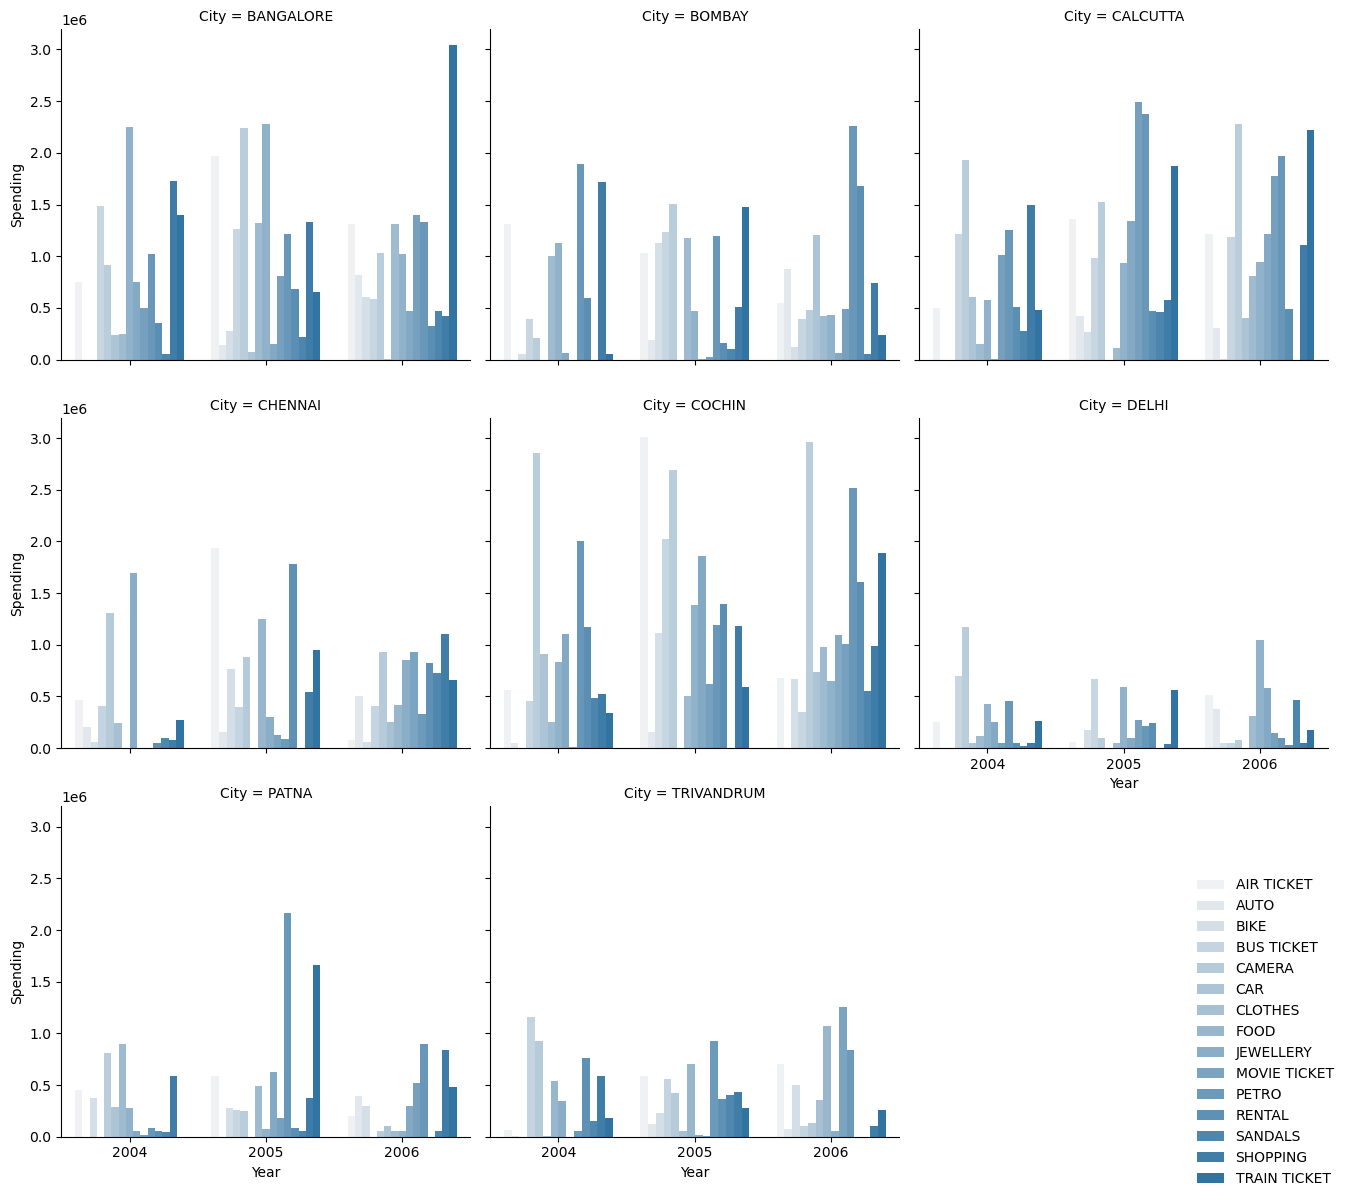

In [32]:
g = sns.FacetGrid(citywise, col='City', col_wrap=3, height=4)
g.map_dataframe(sns.barplot, x='Month_x', y='Spent', hue='Type')
g.set_axis_labels('Year', 'Spending')
g.add_legend(loc = 'lower right')

plt.tight_layout()
plt.show()

### 4. Create graphs for

**a. Monthly comparison of total spends, city wise**

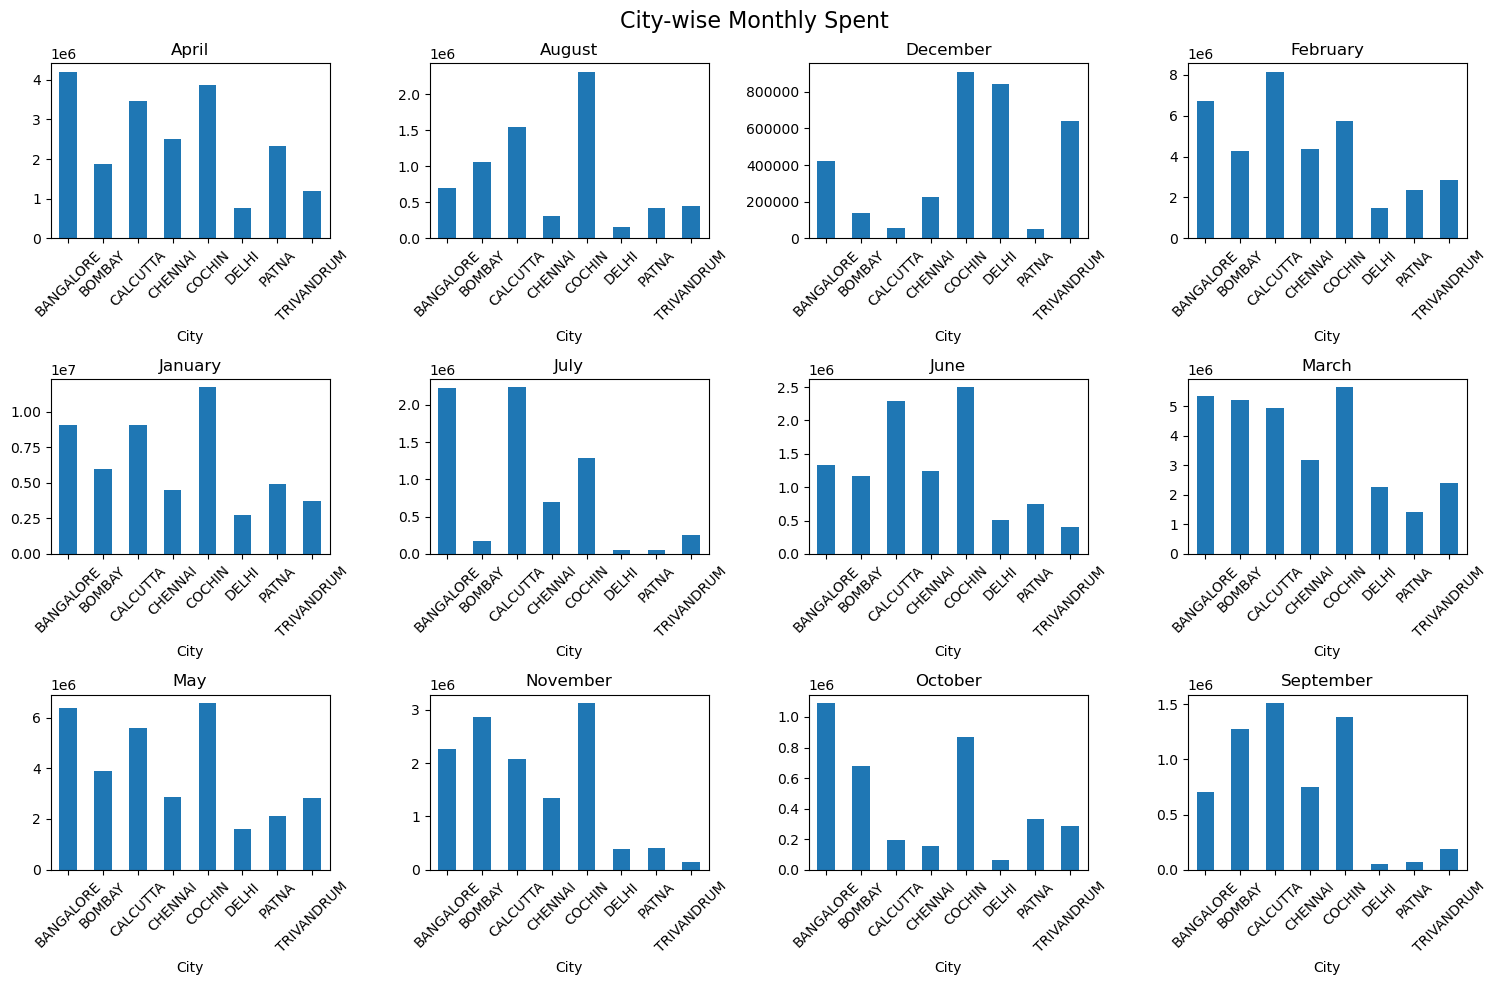

In [62]:
monthly = final.groupby([final.Month_x.dt.strftime('%B'), 'City'])['Spent'].sum().reset_index()
months = monthly['Month_x'].unique()

# Create subplots for each month
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 10))  # Adjust the size as needed
fig.suptitle('City-wise Monthly Spent', fontsize=16)

# Iterate through each month and plot city-wise spent
for i, month in enumerate(months):
    ax = axes[(i)//4, (i)%4]
    data = monthly[monthly['Month_x'] == month]
    data.plot(kind='bar', x='City', y='Spent', ax=ax, legend=None)
    ax.set_title(month)
    ax.set_xticklabels(data['City'], rotation=45)

plt.tight_layout()

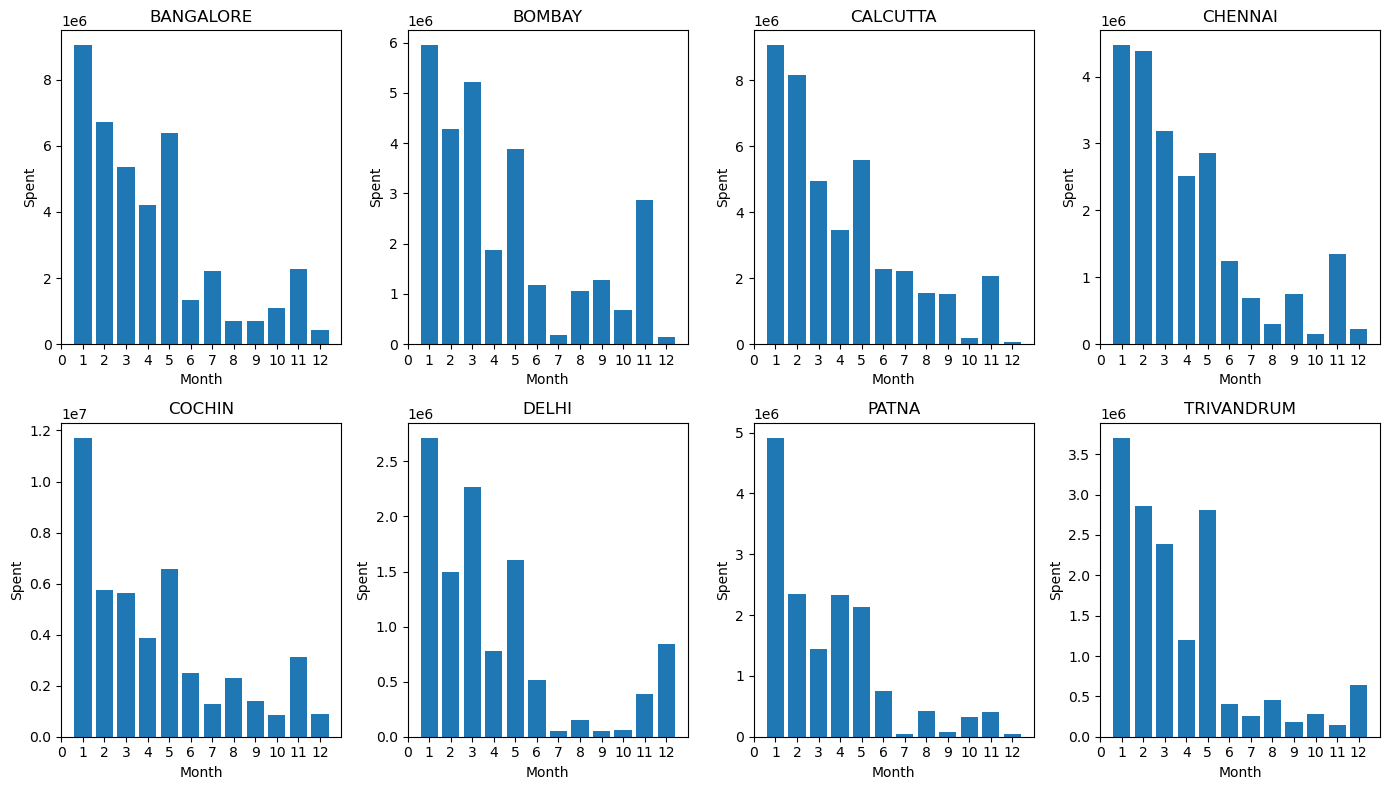

In [44]:
monthly = final.groupby(['City', final.Month_x.dt.month])['Spent'].sum().reset_index()
cities = monthly['City'].unique()
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(14, 8))         # to soft-wire for rows based on columns - (len(cities) + num_cols - 1) // num_cols

# Flatten the 2D axes array
axes = axes.flatten()

for i, city in enumerate(cities):
    ax = axes[i]
    city_data = monthly[monthly['City'] == city]
    ax.bar(city_data['Month_x'], city_data['Spent'])
    ax.set_title(city)
    ax.set_xlabel('Month')
    ax.set_ylabel('Spent')
    ax.set_xticks(list(range(13)))      # to set ticks of x-axis as per months

plt.tight_layout()
plt.show()

**b. Comparison of yearly spend on air tickets**

<Axes: xlabel='City', ylabel='Spent'>

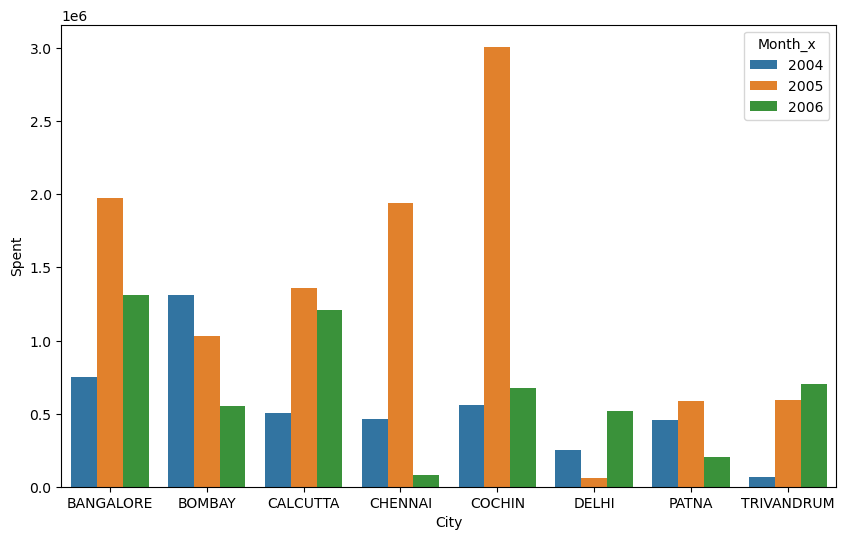

In [45]:
yearly_air = final.loc[final.Type == 'AIR TICKET'].groupby(['City',final.Month_x.dt.year])['Spent'].sum().reset_index()
yearly_air
plt.figure(figsize=(10, 6))
sns.barplot(yearly_air, x='City', y='Spent', hue='Month_x')

**c. Comparison of monthly spend for each product (look for any seasonality that exists in terms of spend)**

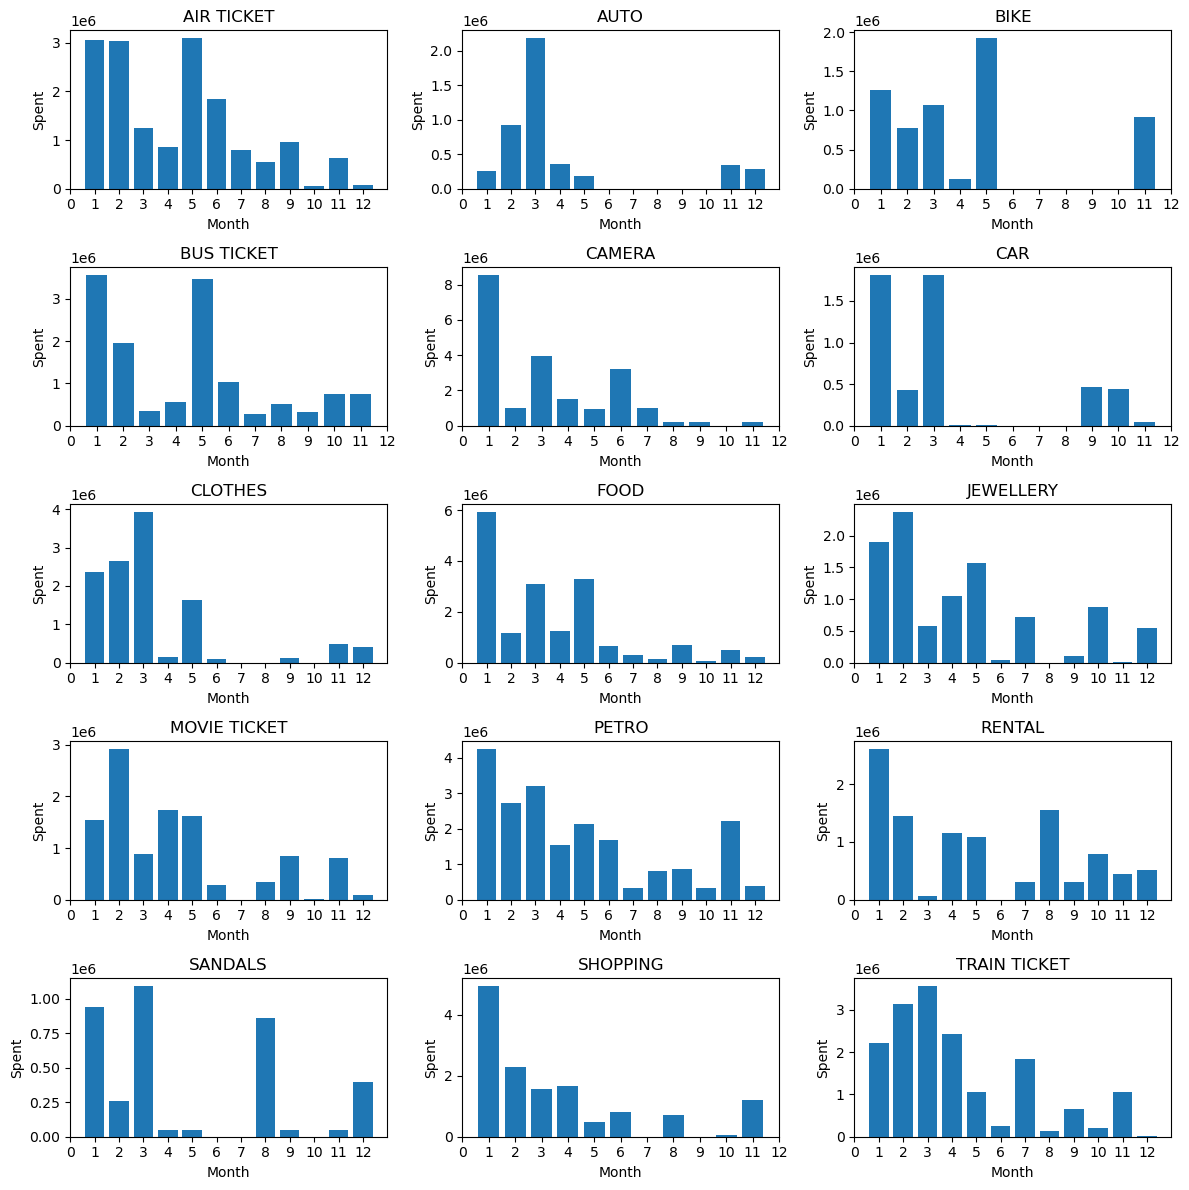

In [57]:
typewise = final.loc[:,['Type','Month_x','Spent']]
typewise['Year'] = final.Month_x.dt.year
typewise['Month'] = final.Month_x.dt.month
typewise = typewise.groupby(['Type','Year','Month'])['Spent'].sum().reset_index()
types = typewise.Type.unique()

fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(12, 12))

axes = axes.flatten()

for i, types in enumerate(types):
    ax = axes[i]
    type_data = typewise[typewise['Type'] == types]
    ax.bar(type_data['Month'], type_data['Spent'], data=typewise)
    ax.set_title(types)
    ax.set_xlabel('Month')
    ax.set_ylabel('Spent')
    ax.set_xticks(list(range(13)))      # to set ticks of x-axis as per months

plt.tight_layout()
plt.show()

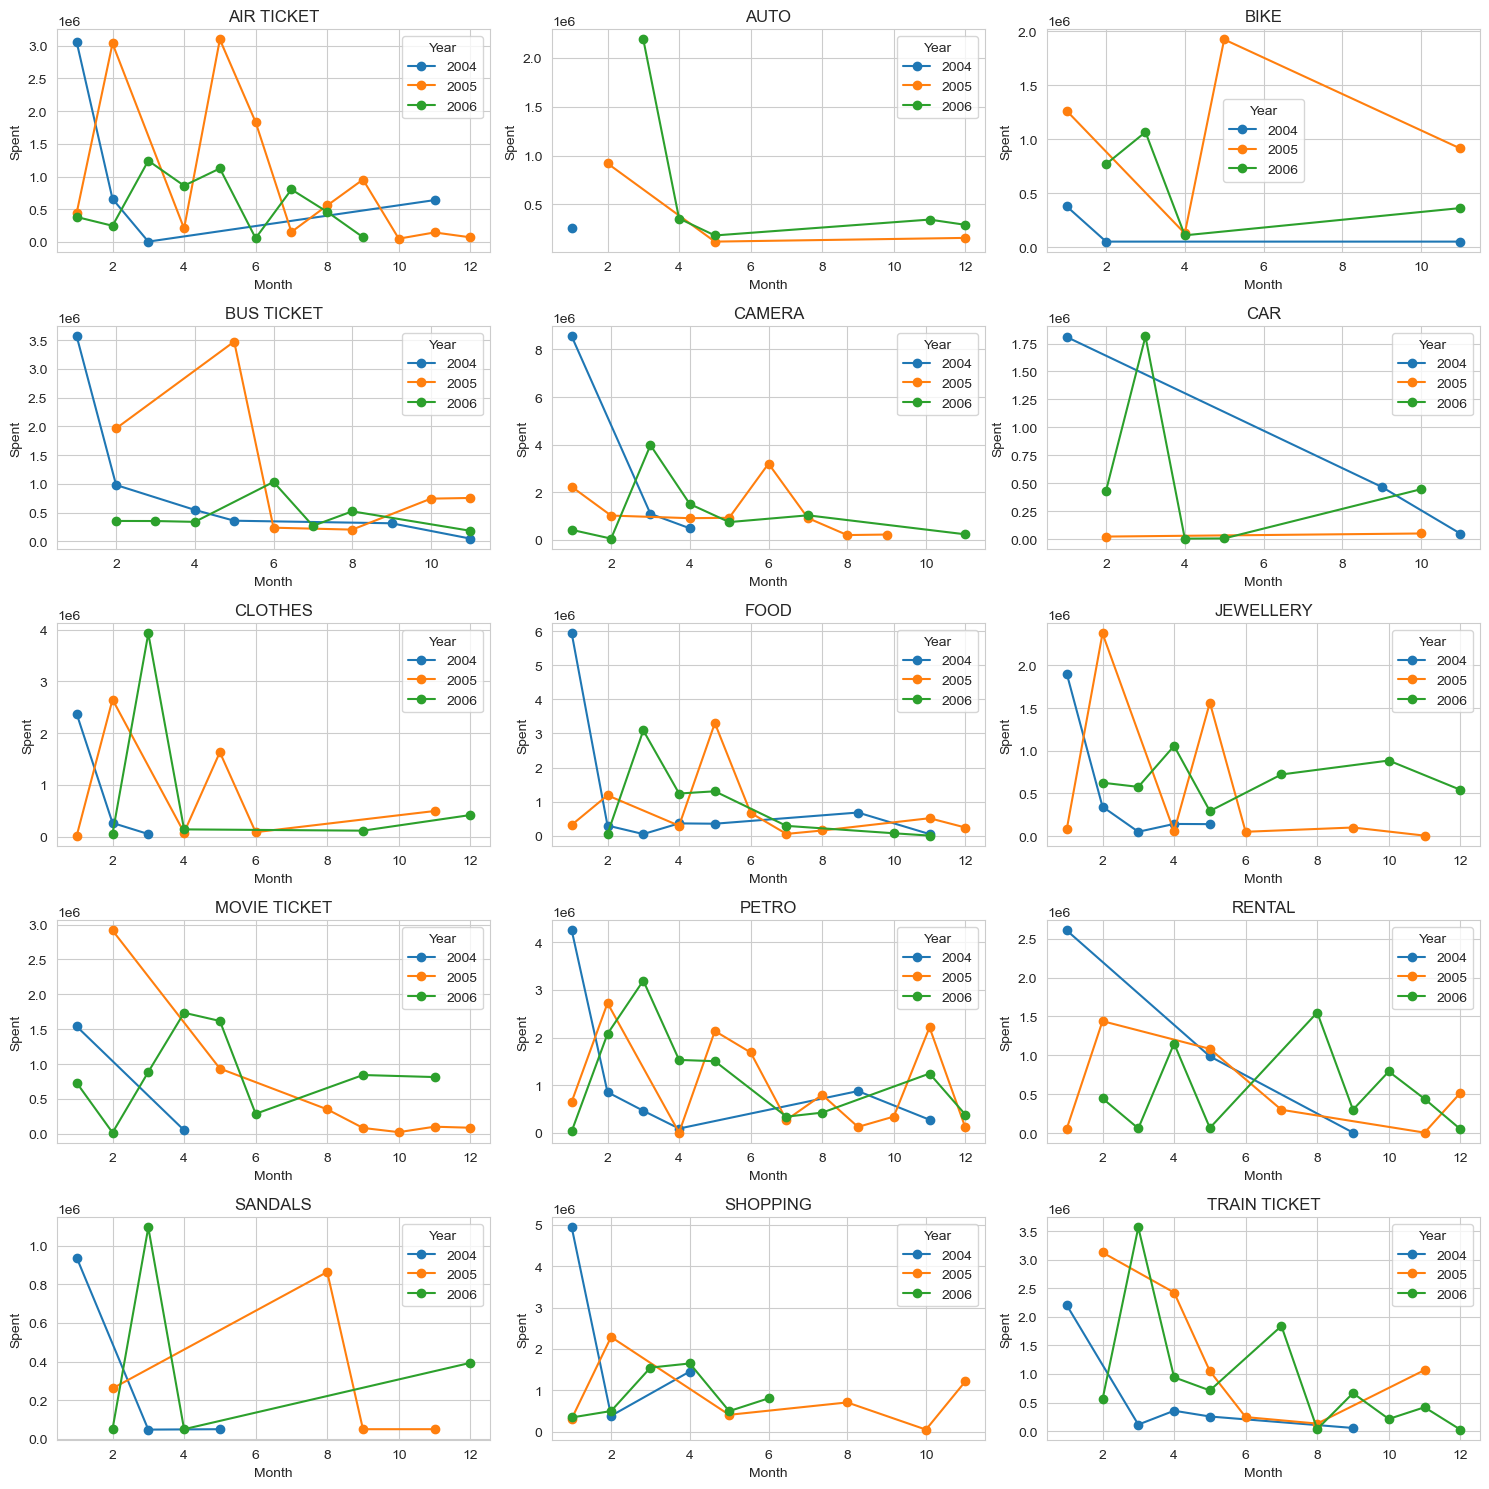

In [76]:
typewise = final.loc[:,['Type','Month_x','Spent']]
typewise['Month'] = typewise.Month_x.dt.month
typewise['Year'] = typewise.Month_x.dt.year
spent_type = typewise.groupby(['Type', 'Year', 'Month'])['Spent'].sum().reset_index()

# Create subplots for each type
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15, 15))

# Iterate through each type and plot line chart
for i, (type_, group) in enumerate(spent_type.groupby('Type')):
    row = i // 3  # Calculate the row index
    col = i % 3   # Calculate the column index
    ax = axes[row, col]
    for year, data in group.groupby('Year'):
        data.plot(x='Month', y='Spent', ax=ax, label=year, marker='o')
    ax.set_title(type_)
    ax.set_xlabel('Month')
    ax.set_ylabel('Spent')
    ax.legend(title='Year')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()

### 5. UDF
**You need to find top 10 customers for each city in terms of their repayment amount by 
different products and by different time periods i.e. year or month. The user should be able 
to specify the product (Gold/Silver/Platinum) and time period (yearly or monthly) and the 
function should automatically take these inputs while identifying the top 10 customers.**

In [163]:
def top10(product, period):
    if period == 'Yearly':
        data = final.loc[final.Product == product]
        data = data.groupby(['City','Customer',data.Month_y.dt.year])['Repaid'].sum().reset_index()
        top_ten = data.groupby(['City','Month_y']).apply(lambda x: x.nlargest(10, 'Repaid')).reset_index(drop=True)
        return top_ten
    elif period == 'Monthly':
        data = final.loc[final.Product == product]
        data = data.groupby(['City','Customer',data.Month_y.dt.month])['Repaid'].sum().reset_index()
        top_ten = data.groupby(['City','Month_y']).apply(lambda x: x.nlargest(10, 'Repaid')).reset_index(drop=True)
        return top_ten
    else:
        print('Kindly check the spelling correctly, and try again')

print('Data has Platimum as a spelling instead of Platinum, so watch for spelling ahead')
product = input('Enter a product category (Gold/Silver/Platimum) : ')
period = input('Type of time period (Yearly/Monthly): ')
top10(product, period)

Data has Platimum as a spelling instead of Platinum, so watch for spelling ahead
Enter a product category (Gold/Silver/Platimum) : Gold
Type of time period (Yearly/Monthly): Monthly


,City,Customer,Month_y,Repaid
0,BANGALORE,A1,1,2407806.29
1,BANGALORE,A13,1,2014186.98
2,BANGALORE,A43,1,1978038.15
3,BANGALORE,A14,1,993114.87
4,BANGALORE,A30,1,608066.49
...,...,...,...,...
206,TRIVANDRUM,A28,4,115326.71
207,TRIVANDRUM,A28,5,2233253.41
208,TRIVANDRUM,A28,7,380460.40
209,TRIVANDRUM,A28,8,437823.07
